In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [2]:
# Load the dataset
file_path = "/Users/stageacomeback/Desktop/Gerard Lee/PolyU SPEED RA/Exploratory Factor Analysis/Sumarised Dataset/Round 4 CSV/R4 EFA 2nd Combination.csv"
data = pd.read_csv(file_path)

In [3]:
# Data Cleaning: Remove outliers
data_cleaned = data[(np.abs(zscore(data)) < 3).all(axis=1)]

In [4]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

In [5]:
# Check KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_cleaned)
print("KMO Score:", kmo_model)

KMO Score: 0.9491695572164965


/Users/stageacomeback/anaconda3/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [6]:
# Determine optimal number of factors using Scree Plot
fa = FactorAnalyzer(rotation=None)
fa.fit(scaled_data)
eigenvalues, _ = fa.get_eigenvalues()

/Users/stageacomeback/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


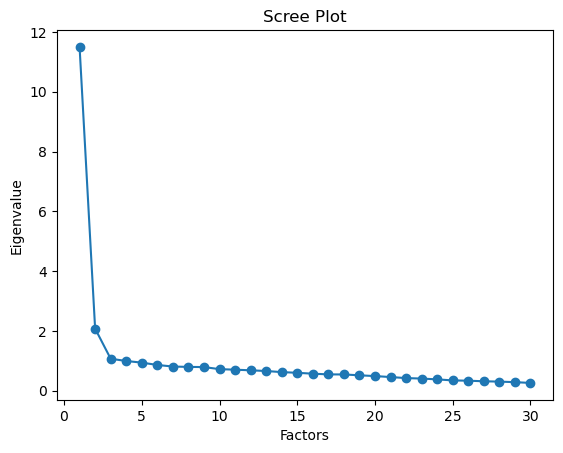

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker="o")
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.show()

In [28]:
# Perform Factor Analysis with an assigned rotation method
n_factors = 6  # Adjust based on scree plot or eigenvalues
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax", method="principal")
fa.fit(scaled_data)

/Users/stageacomeback/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(method='principal', n_factors=6, rotation='varimax',
               rotation_kwargs={})

In [29]:
# Extract and clean the Pattern Matrix
pattern_matrix = fa.loadings_
pattern_matrix[np.abs(pattern_matrix) < 0.60] = 0  # Suppress small coefficients

In [30]:
# Reassign variables to the dominant component
max_loadings = np.argmax(np.abs(pattern_matrix), axis=1)
reassigned_matrix = np.zeros_like(pattern_matrix)
for i, max_idx in enumerate(max_loadings):
    reassigned_matrix[i, max_idx] = pattern_matrix[i, max_idx]

In [31]:
# Convert to a DataFrame for better readability
columns = [f"Component {i+1}" for i in range(n_factors)]
pattern_df = pd.DataFrame(reassigned_matrix, columns=columns, index=data_cleaned.columns)

In [34]:
# Print the cleaned Pattern Matrix
print("Cleaned Pattern Matrix:")
print(pattern_df)

Cleaned Pattern Matrix:
        Component 1  Component 2  Component 3  Component 4  Component 5  \
R4IE1      0.000000     0.000000          0.0     0.000000     0.000000   
R4IE2      0.000000     0.000000          0.0     0.000000     0.000000   
R4IE3      0.000000     0.000000          0.0     0.000000     0.000000   
R4IE4      0.000000     0.000000          0.0     0.000000     0.000000   
R4IE5      0.000000     0.000000          0.0     0.000000     0.000000   
R4RE1      0.653723     0.000000          0.0     0.000000     0.000000   
R4RE2      0.000000     0.000000          0.0     0.000000     0.000000   
R4RE3      0.000000     0.000000          0.0     0.000000     0.000000   
R4RE4      0.000000     0.000000          0.0     0.000000     0.000000   
R4RE5      0.000000     0.000000          0.0     0.000000     0.764651   
R4SeE1     0.000000     0.000000          0.0     0.000000     0.000000   
R4SeE2     0.000000     0.000000          0.0     0.000000     0.000000   
R